# netflix-original-films-imdb-scores

Use the "Run" button to execute the code.

In [1]:
pip install opendatasets --upgrade --quiet

In [6]:
import opendatasets as od
download_url = 'https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: maheshkumar0018
Your Kaggle Key: ··········


100%|██████████| 12.4k/12.4k [00:00<00:00, 3.30MB/s]

In [48]:
file_path = './netflix-original-films-imdb-scores/NetflixOriginals.csv'

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
netflix_df = pd.read_csv(file_path,encoding='ISO-8859-1')
netflix_df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [51]:
netflix_df.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

## Data Cleaning
1. Check the Null's
2. Finding Outliers / check the distribution
3. Understand the outliers why there are present in the data.

In [52]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [53]:
netflix_df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [54]:
netflix_df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [55]:
netflix_df.shape

(584, 6)

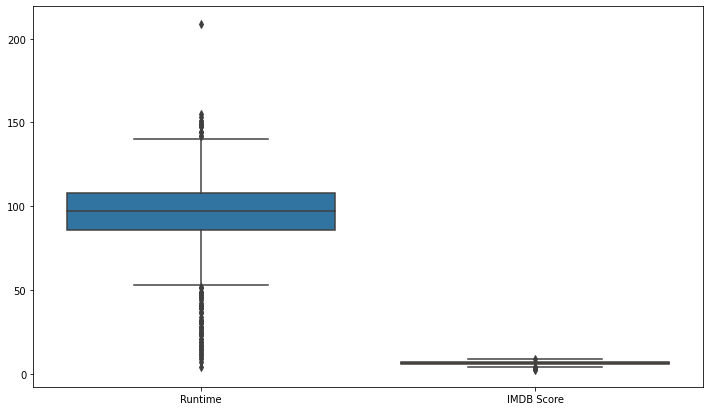

In [56]:
plt.figure(figsize=(12,7))
sns.boxplot(data=netflix_df)
plt.show()

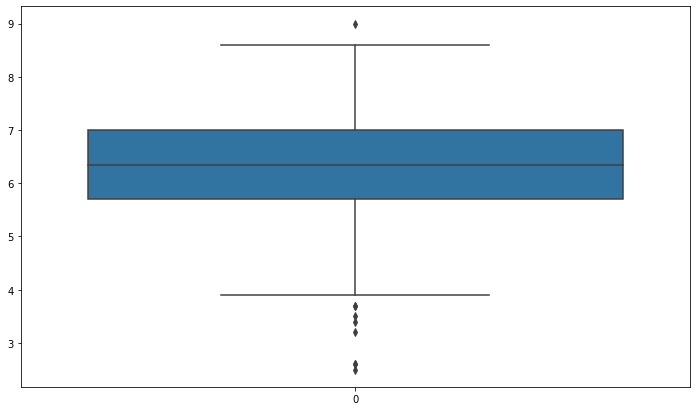

In [57]:
plt.figure(figsize=(12,7))
sns.boxplot(data=netflix_df['IMDB Score'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


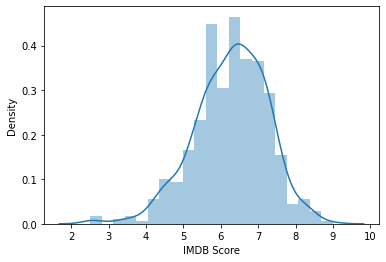

In [58]:
sns.distplot(a=netflix_df['IMDB Score'],hist=True,kde=True)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


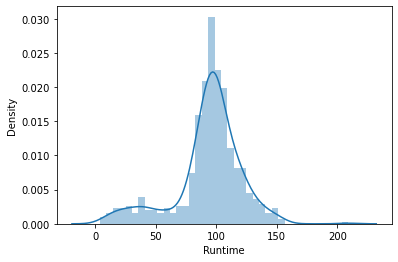

In [59]:
sns.distplot(a=netflix_df['Runtime'],hist=True,kde=True)
plt.show()

Based on the given descriptive info, we can expect outliers from both the maximum side and the minimum side.
Since mean score is lower than median score; we can expect left skewed distribution and we will see more runtime values on the minimum side.

- We need to make an adjustment on the Premiere feature, it should be datetime object.
- Other than that, everything Seems OK.

In [60]:
netflix_df['Premiere']

0         August 5, 2019
1        August 21, 2020
2      December 26, 2019
3       January 19, 2018
4       October 30, 2020
             ...        
579    December 31, 2018
580      October 9, 2015
581    December 16, 2018
582     December 8, 2020
583      October 4, 2020
Name: Premiere, Length: 584, dtype: object

In [61]:
netflix_df['Premiere'] = pd.to_datetime(netflix_df['Premiere'])
netflix_df['Premiere']

0     2019-08-05
1     2020-08-21
2     2019-12-26
3     2018-01-19
4     2020-10-30
         ...    
579   2018-12-31
580   2015-10-09
581   2018-12-16
582   2020-12-08
583   2020-10-04
Name: Premiere, Length: 584, dtype: datetime64[ns]

- Let's make use of it and make columns out of it, such as, year, month, day.

In [62]:
netflix_df['year_month']= netflix_df['Premiere'].dt.strftime('%Y-%m')
netflix_df['year'] = netflix_df['Premiere'].dt.year
netflix_df['month']= netflix_df['Premiere'].dt.month
netflix_df['day_of_week']=netflix_df['Premiere'].dt.dayofweek
netflix_df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year_month,year,month,day_of_week
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019-08,2019,8,0
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020-08,2020,8,4
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019-12,2019,12,3
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018-01,2018,1,4
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020-10,2020,10,4


## EDA - Exploratory Data Analysis

In [ ]:
netflix_df.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language',
       'year_month', 'year', 'month', 'day_of_week'],
      dtype='object')

#### Genre Feature

In [ ]:
netflix_df['Genre'].nunique()

115

In [ ]:
netflix_df['Genre'].value_counts()

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64

In [ ]:
netflix_top_ten_genre = netflix_df['Genre'].value_counts()[:20]
netflix_top_ten_genre = pd.DataFrame(netflix_top_ten_genre).reset_index()
netflix_top_ten_genre = netflix_top_ten_genre.rename(columns={"index":"Top 20 Genre","Genre":"Count"})
netflix_top_ten_genre

,Top 20 Genre,Count
0,Documentary,159
1,Drama,77
2,Comedy,49
3,Romantic comedy,39
4,Thriller,33
5,Comedy-drama,14
6,Crime drama,11
7,Biopic,9
8,Horror,9
9,Action,7


In [ ]:
## check the percentages of Genre
netflix_df['Genre'].value_counts()/len(netflix_df)

Documentary                             0.272260
Drama                                   0.131849
Comedy                                  0.083904
Romantic comedy                         0.066781
Thriller                                0.056507
                                          ...   
Romantic comedy-drama                   0.001712
Heist film/Thriller                     0.001712
Musical/Western/Fantasy                 0.001712
Horror anthology                        0.001712
Animation/Christmas/Comedy/Adventure    0.001712
Name: Genre, Length: 115, dtype: float64

- 27.2% of the movies on the Documentary genre, then 13% of the movies on Drama genre.
- Majority of the movies come from different genres and each genre shares at around 1% each.

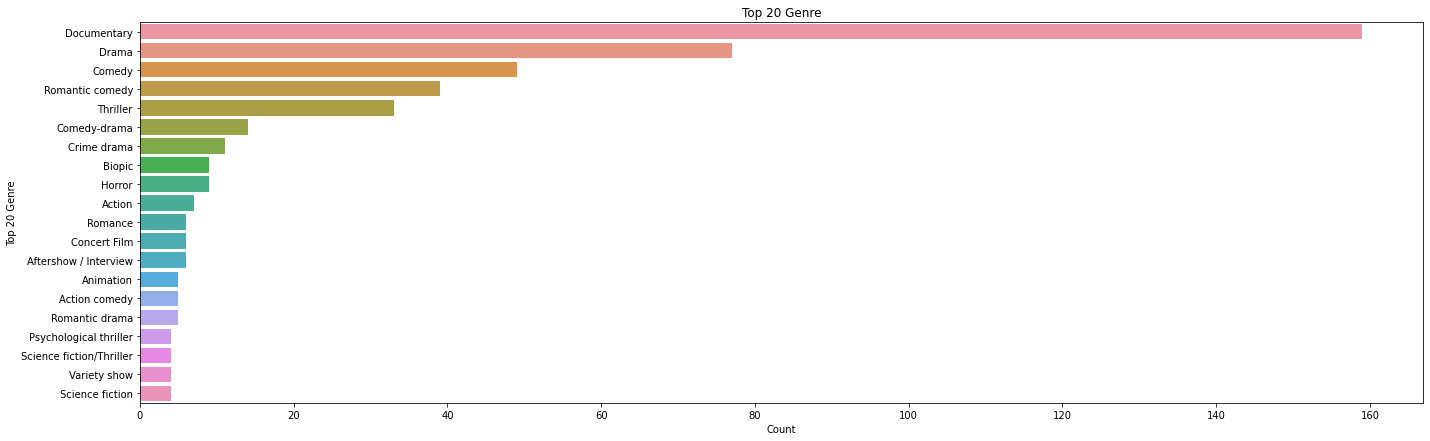

In [ ]:
plt.figure(figsize=(23,7))
sns.barplot(y='Top 20 Genre',x='Count',data=netflix_top_ten_genre)
plt.title('Top 20 Genre')
plt.show()

#### Languages Feature

In [ ]:
netflix_df['Language'].nunique()

38

In [ ]:
top_ten_languages = netflix_df['Language'].value_counts()[:10]
top_ten_languages = pd.DataFrame(top_ten_languages).reset_index()
top_ten_languages = top_ten_languages.rename(columns={'index':'Top 10 Languages','Language':'Count'})
top_ten_languages

,Top 10 Languages,Count
0,English,401
1,Hindi,33
2,Spanish,31
3,French,20
4,Italian,14
5,Portuguese,12
6,Indonesian,9
7,Japanese,6
8,Korean,6
9,German,5


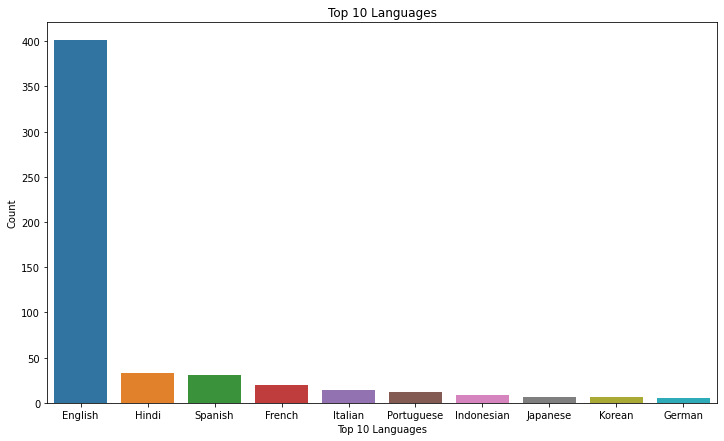

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x='Top 10 Languages',y='Count',data=top_ten_languages)
plt.title('Top 10 Languages')
plt.show()

English is the most used language in the programs, Hindi and Spanish follows it.

#### Runtime Feature

In [ ]:
netflix_df['Runtime'].nunique()

124

In [ ]:
## top 10 Runtimes
top_ten_runtimes = netflix_df['Runtime'].value_counts()[:10]
top_ten_runtimes = pd.DataFrame(top_ten_runtimes).reset_index()
top_ten_runtimes = top_ten_runtimes.rename(columns={'index':'Runtime','Runtime':'Count'})
top_ten_runtimes

,Runtime,Count
0,97,24
1,98,19
2,94,19
3,95,18
4,100,17
5,92,17
6,89,16
7,90,16
8,101,15
9,102,14


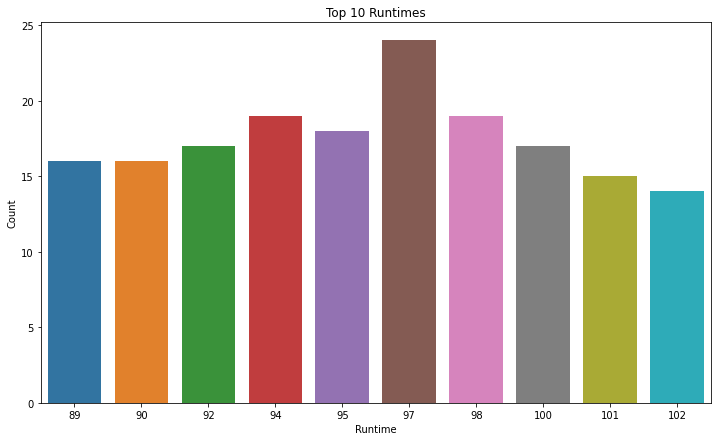

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x='Runtime',y='Count',data=top_ten_runtimes)
plt.title('Top 10 Runtimes')
plt.show()

In [ ]:
netflix_df['Runtime'].describe()

count    584.000000
mean      93.577055
std       27.761683
min        4.000000
25%       86.000000
50%       97.000000
75%      108.000000
max      209.000000
Name: Runtime, dtype: float64

- We have at around 93-97 minutes runtime for the programs in Netflix.
Based on the given descriptive info, we can expect outliers from both the maximum side and the minimum side.
- Since mean score is lower than median score; we can expect left skewed distribution and we will see more runtime values on the minimum side.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


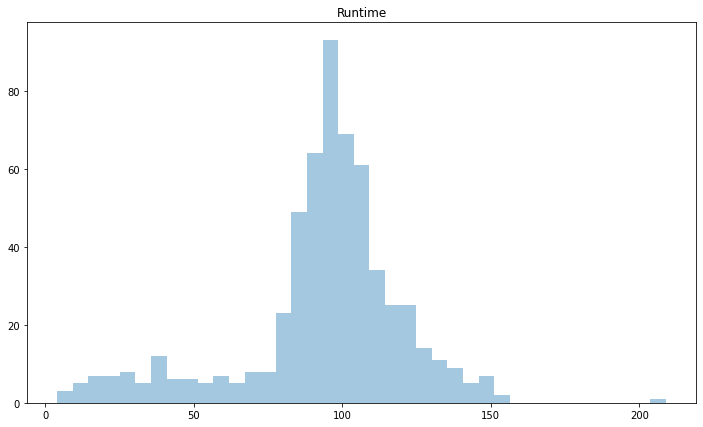

In [ ]:
plt.figure(figsize=(12,7))
sns.distplot(netflix_df,x=netflix_df['Runtime'],hist=True, kde=False)
plt.title('Runtime')
plt.show()

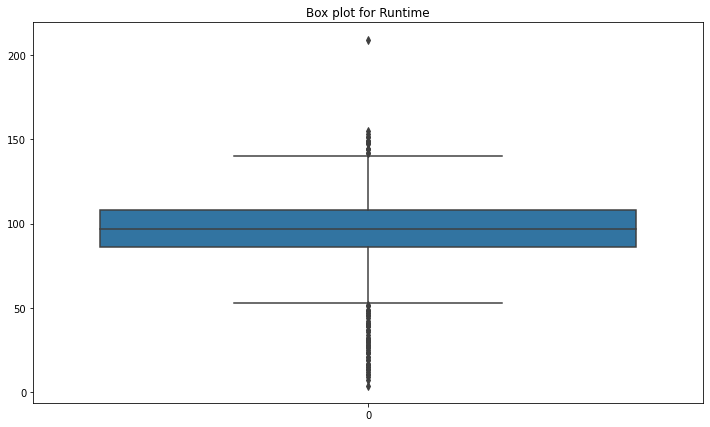

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(data=netflix_df['Runtime'])
plt.title("Box plot for Runtime")
plt.show()

- As we expected, we have left skewed distribution with multiple outliers are on the both side, but much more are on the left side-minimum side.

- Movie with the maximum runtime is 'Irishman', yeah, agreed, it was quite a - long movie. But no complaints. I loved to see Al Pacino and Robert De Niro at the same movie.

- Minimum runtime was 4 minute animation 'Sol Levante'

#### IMDB Score Feature

In [ ]:
netflix_df['IMDB Score'].nunique()

54

In [ ]:
netflix_df['IMDB Score'].describe()

count    584.000000
mean       6.271747
std        0.979256
min        2.500000
25%        5.700000
50%        6.350000
75%        7.000000
max        9.000000
Name: IMDB Score, dtype: float64

In [ ]:
netflix_df['IMDB Score'].median()

6.35

- Programs in the Netflix, got around 6.3 average rating. Max 9 and minum was 2.5.

- Mean and median values are close to each other. Since median is bigger than mean score, we can expect left skewed distribution with several outliers are on the left side-minimum side.



In [ ]:
netflix_df['IMDB Score']

0      2.5
1      2.6
2      2.6
3      3.2
4      3.4
      ... 
579    8.4
580    8.4
581    8.5
582    8.6
583    9.0
Name: IMDB Score, Length: 584, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


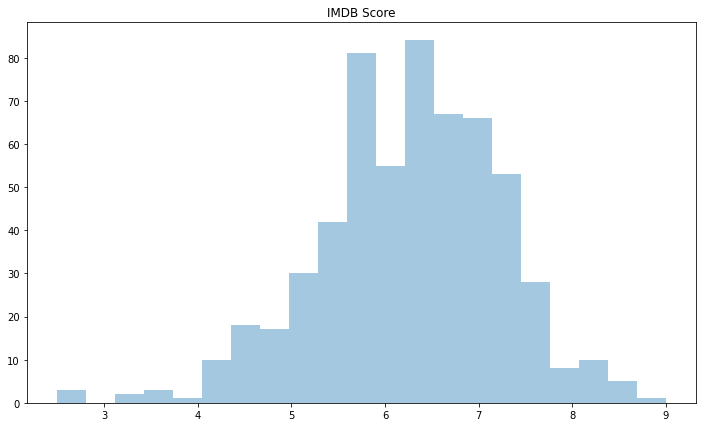

In [ ]:
plt.figure(figsize=(12,7))
sns.distplot(netflix_df, x= netflix_df['IMDB Score'],hist=True,kde=False)
plt.title('IMDB Score')
plt.show()

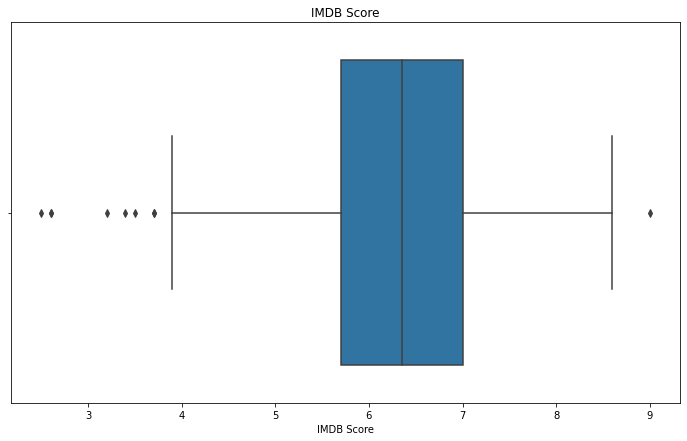

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x= 'IMDB Score',data= netflix_df)
plt.title('IMDB Score')
plt.show()

In [ ]:
imdb_score_Title = netflix_df.groupby(['IMDB Score','Title']).count().sort_values(by='IMDB Score',ascending=False)
imdb_score_Title

Genre  Premiere  \
IMDB Score Title                                                          
9.0        David Attenborough: A Life on Our Planet         1         1   
8.6        Emicida: AmarElo - It's All For Yesterday        1         1   
8.5        Springsteen on Broadway                          1         1   
8.4        Winter on Fire: Ukraine's Fight for Freedom      1         1   
           Taylor Swift: Reputation Stadium Tour            1         1   
...                                                       ...       ...   
3.4        Kaali Khuhi                                      1         1   
3.2        The Open House                                   1         1   
2.6        The App                                          1         1   
           Dark Forces                                      1         1   
2.5        Enter the Anime                                  1         1   

                                                        Runtime  Language  \
IMDB Score Title                                                            
9.0        David Attenborough: A Life on Our Planet           1         1   
8.6        Emicida: AmarElo - It's All For Yesterday          1         1   
8.5        Springsteen on Broadway                            1         1   
8.4        Winter on Fire: Ukraine's Fight for Freedom        1         1   
           Taylor Swift: Reputation Stadium Tour              1         1   
...                                                         ...       ...   
3.4        Kaali Khuhi                                        1         1   
3.2        The Open House                                     1         1   
2.6        The App                                            1         1   
           Dark Forces                                        1         1   
2.5        Enter the Anime                                    1         1   

                                                        year_month  year  \
IMDB Score Title                                                           
9.0        David Attenborough: A Life on Our Planet              1     1   
8.6        Emicida: AmarElo - It's All For Yesterday             1     1   
8.5        Springsteen on Broadway                               1     1   
8.4        Winter on Fire: Ukraine's Fight for Freedom           1     1   
           Taylor Swift: Reputation Stadium Tour                 1     1   
...                                                            ...   ...   
3.4        Kaali Khuhi                                           1     1   
3.2        The Open House                                        1     1   
2.6        The App                                               1     1   
           Dark Forces                                           1     1   
2.5        Enter the Anime                                       1     1   

                                                        month  day_of_week  
IMDB Score Title                                                            
9.0        David Attenborough: A Life on Our Planet         1            1  
8.6        Emicida: AmarElo - It's All For Yesterday        1            1  
8.5        Springsteen on Broadway                          1            1  
8.4        Winter on Fire: Ukraine's Fight for Freedom      1            1  
           Taylor Swift: Reputation Stadium Tour            1            1  
...                                                       ...          ...  
3.4        Kaali Khuhi                                      1            1  
3.2        The Open House                                   1            1  
2.6        The App                                          1            1  
           Dark Forces                                      1            1  
2.5        Enter the Anime                                  1            1  

[584 rows x 8 columns]

- The maximum IMDB Score for David Attenborough: A Life on Our Planet	
- The minimum IMDB Score for Enter the Anime	
- Interestingly both maximum and minimum rating programs are from documentary genre.

### Corelation between Runtime and IMDB Score

In [ ]:
corr = netflix_df[['Runtime','IMDB Score']].corr()
corr

,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


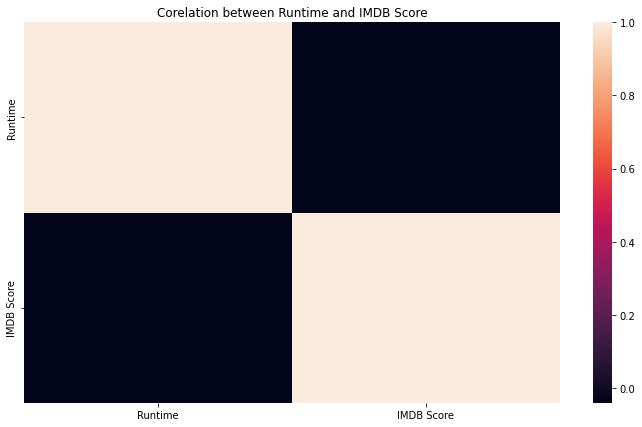

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(corr)
plt.title('Corelation between Runtime and IMDB Score')
plt.show()

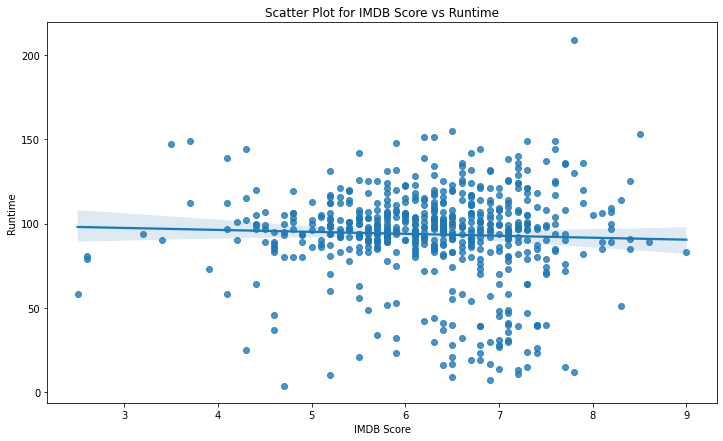

In [ ]:
plt.figure(figsize=(12,7))
sns.regplot(x=netflix_df['IMDB Score'],y=netflix_df['Runtime'])
plt.title("Scatter Plot for IMDB Score vs Runtime")
plt.show()

- A correlation coefficient of **-0.040** indicates a **weak negative correlation** between the two variables. This means that as one variable increases, the other variable tends to decrease slightly, but the relationship is not very strong.

#### Count of Movies in each Year

In [ ]:
year = netflix_df['year'].value_counts()
year = pd.DataFrame(year).reset_index()
year = year.rename(columns={'index':'Year','year':'No of Movies'})
year

,Year,No of Movies
0,2020,183
1,2019,125
2,2018,99
3,2021,71
4,2017,66
5,2016,30
6,2015,9
7,2014,1


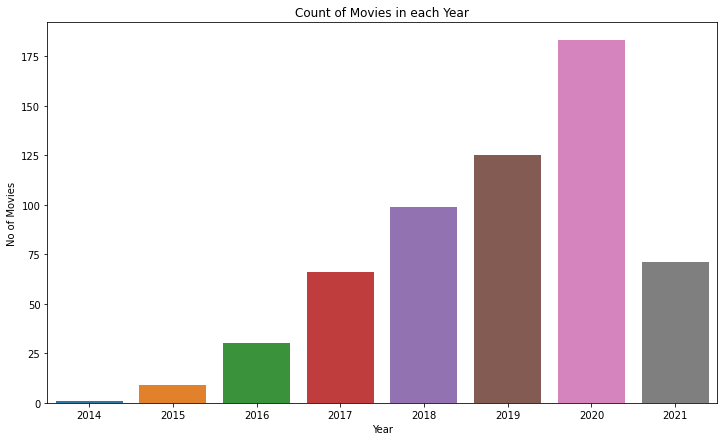

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x='Year',y='No of Movies',data=year)
plt.title('Count of Movies in each Year')
plt.show()

- As one can expect, each year number of programs in the Netflix increase.
- Since we don't have full data on the 2021, difference between 2020 and 2021 is normal.


#### Count of Movies in Each Month

In [ ]:
month = netflix_df['month'].value_counts(sort=False)
month

8     37
12    51
1     37
10    77
11    57
6     35
3     48
5     53
4     63
9     53
2     39
7     34
Name: month, dtype: int64

In [ ]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

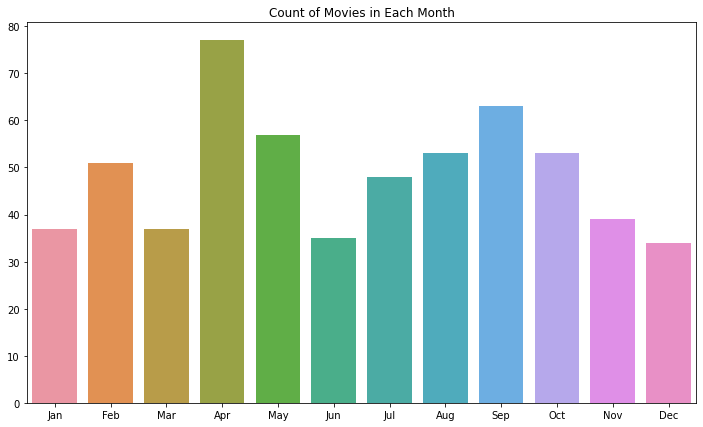

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(data=month,x=months,y=month.values)
plt.title('Count of Movies in Each Month')
plt.show()

- Number of program releases differs by months. October and April are the months which have the highest number of program releases.

- During the summer time, Jun-Aug, the least number of movie is released.

#### Count of Movies in Each Day

In [ ]:
days= netflix_df['day_of_week'].value_counts(sort=False)
days

0     17
4    383
3     59
1     29
2     82
6      9
5      5
Name: day_of_week, dtype: int64

In [ ]:
day = ['Mon','Fri','Thu','Tue','Wed','Sun','Sat']

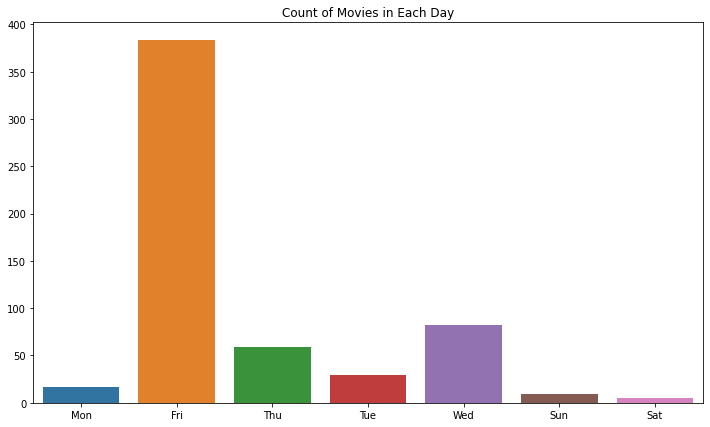

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(data=days,x=day,y=days.values)
plt.title('Count of Movies in Each Day')
plt.show()

Friday has the maximum number of new releases.

Saturday and Sunday have the lowest number of releases.

#### Top 10 Ratings by Genre

In [33]:
top_10_ratings_by_genre = netflix_df.groupby('Genre')['IMDB Score'].mean().sort_values(ascending=False)[:10]
top_10_ratings_by_genre = pd.DataFrame(top_10_ratings_by_genre)
top_10_ratings_by_genre = top_10_ratings_by_genre.reset_index()
top_10_ratings_by_genre

,Genre,IMDB Score
0,Animation/Christmas/Comedy/Adventure,8.200000
1,Musical / Short,7.700000
2,Concert Film,7.633333
3,Anthology/Dark comedy,7.600000
4,Animation / Science Fiction,7.500000
5,Making-of,7.450000
6,Action-adventure,7.300000
7,Historical drama,7.200000
8,Coming-of-age comedy-drama,7.200000
9,Drama-Comedy,7.200000


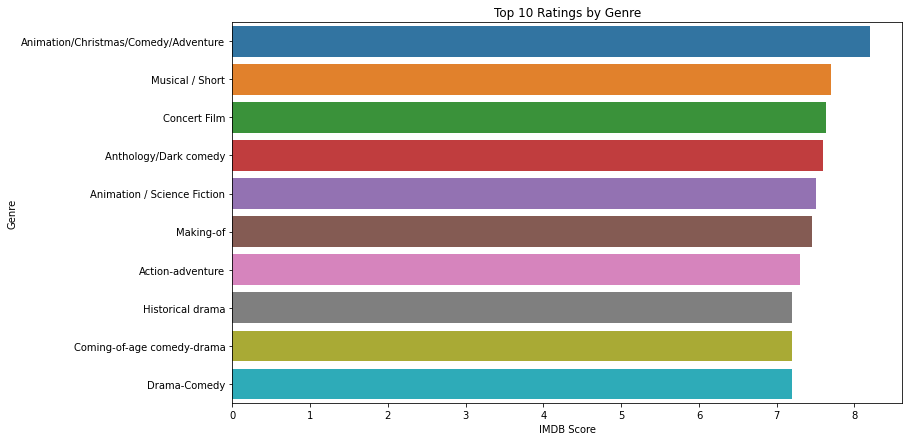

In [34]:
plt.figure(figsize=(12,7))
sns.barplot(x='IMDB Score',y='Genre',data=top_10_ratings_by_genre)
plt.title('Top 10 Ratings by Genre')
plt.show()

Top rating score is on the Animation-Christmas-Comedy-Adventure Genre then Musical/short and Concert Film.

#### Lowest 10 Ratings by Genre

In [40]:
top_10_lowest_ratings_genre = netflix_df.groupby('Genre')['IMDB Score'].mean().sort_values()[:10]
top_10_lowest_ratings_genre = pd.DataFrame(top_10_lowest_ratings_genre)
top_10_lowest_ratings_genre = top_10_lowest_ratings_genre.reset_index()
top_10_lowest_ratings_genre

,Genre,IMDB Score
0,Heist film/Thriller,3.700000
1,Musical/Western/Fantasy,3.900000
2,Horror anthology,4.300000
3,Political thriller,4.300000
4,Superhero-Comedy,4.400000
5,Science fiction/Drama,4.533333
6,Romance drama,4.600000
7,Mystery,4.650000
8,Horror thriller,4.700000
9,Anime / Short,4.700000


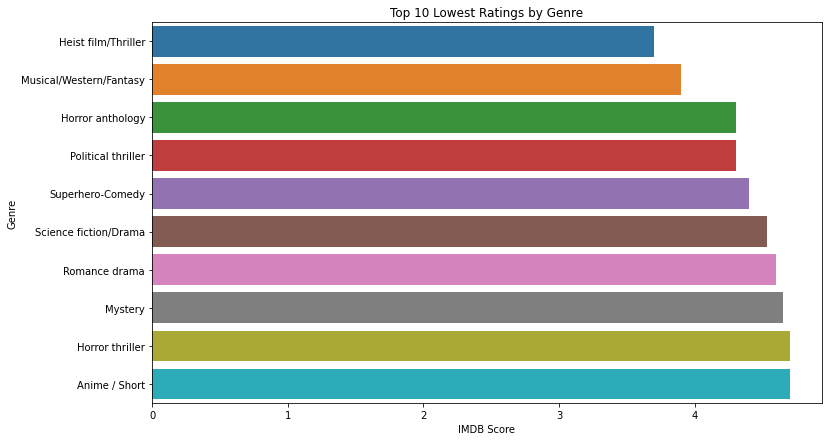

In [42]:
plt.figure(figsize=(12,7))
sns.barplot(x='IMDB Score',y='Genre',data=top_10_lowest_ratings_genre)
plt.title('Top 10 Lowest Ratings by Genre')
plt.show()

Lowest rating movies are from Heist film/Thriller, Musical/Wester/Fantasy and Horror Anthology genres.

#### Top 20 High Rating Movies

In [75]:
top_20_high_rating_movies = netflix_df[['IMDB Score','Title','Genre','year','Language']].sort_values(by='IMDB Score',ascending=False)[:20]
top_20_high_rating_movies = pd.DataFrame(top_20_high_rating_movies).reset_index()
top_20_high_rating_movies.drop('index',axis=1,inplace=True)
top_20_high_rating_movies

,IMDB Score,Title,Genre,year,Language
0,9.0,David Attenborough: A Life on Our Planet,Documentary,2020,English
1,8.6,Emicida: AmarElo - It's All For Yesterday,Documentary,2020,Portuguese
2,8.5,Springsteen on Broadway,One-man show,2018,English
3,8.4,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015,English/Ukranian/Russian
4,8.4,Taylor Swift: Reputation Stadium Tour,Concert Film,2018,English
5,8.4,Ben Platt: Live from Radio City Music Hall,Concert Film,2020,English
6,8.3,Dancing with the Birds,Documentary,2019,English
7,8.3,Cuba and the Cameraman,Documentary,2017,English
8,8.2,Klaus,Animation/Christmas/Comedy/Adventure,2019,English
9,8.2,13th,Documentary,2016,English


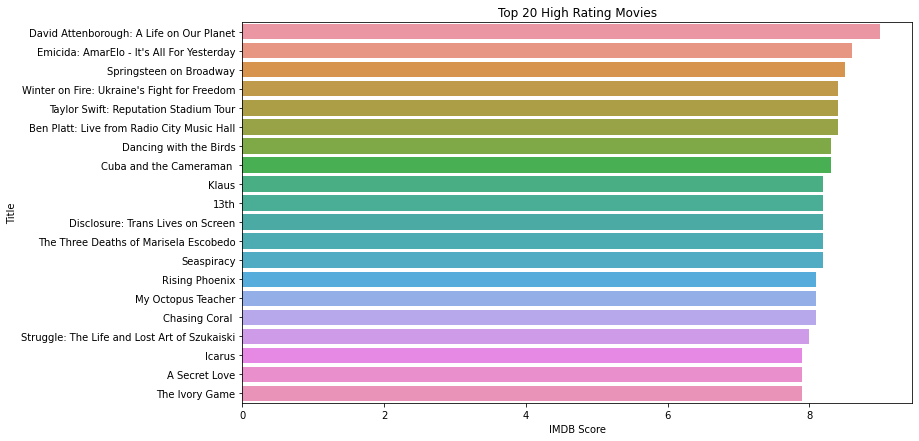

In [76]:
plt.figure(figsize=(12,7))
sns.barplot(y='Title',x='IMDB Score',data=top_20_high_rating_movies)
plt.title('Top 20 High Rating Movies')
plt.show()

16 out 20 top rated movies come from Documentary genre.

#### 20 Lowest Rated Movies


In [78]:
top_20_low_rating_movies = netflix_df[['IMDB Score','Title','Genre','year','Language']].sort_values(by='IMDB Score',ascending=True)[:20]
top_20_low_rating_movies = pd.DataFrame(top_20_low_rating_movies).reset_index()
top_20_low_rating_movies.drop('index',axis=1,inplace=True)
top_20_low_rating_movies

,IMDB Score,Title,Genre,year,Language
0,2.5,Enter the Anime,Documentary,2019,English/Japanese
1,2.6,Dark Forces,Thriller,2020,Spanish
2,2.6,The App,Science fiction/Drama,2019,Italian
3,3.2,The Open House,Horror thriller,2018,English
4,3.4,Kaali Khuhi,Mystery,2020,Hindi
5,3.5,Drive,Action,2019,Hindi
6,3.7,Leyla Everlasting,Comedy,2020,Turkish
7,3.7,The Last Days of American Crime,Heist film/Thriller,2020,English
8,3.9,Paradox,Musical/Western/Fantasy,2018,English
9,4.1,Sardar Ka Grandson,Comedy,2021,Hindi


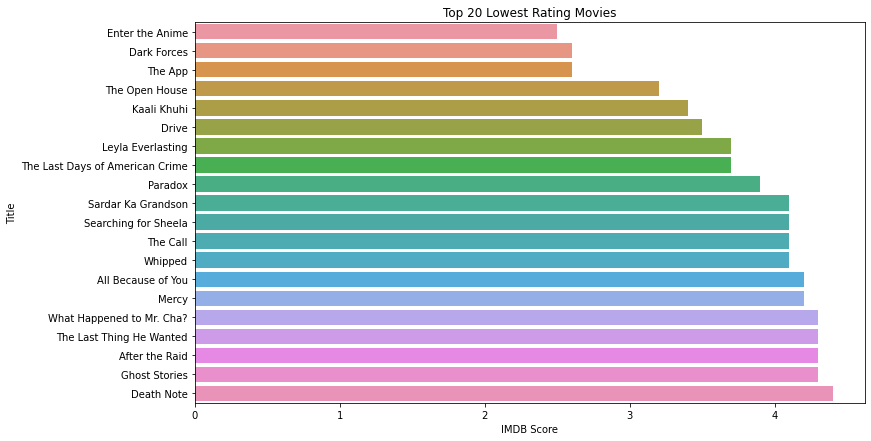

In [79]:
plt.figure(figsize=(12,7))
sns.barplot(y='Title',x='IMDB Score',data=top_20_low_rating_movies)
plt.title('Top 20 Lowest Rating Movies')
plt.show()